                                                Customer Segmentation Analysis
Problem Discription :
        You own the mall and want to understand the customers who can quickly
converge [Target Customers] so that the insight can be given to the
marketing team and plan the strategy accordingly.

1 : Download the dataset
2 : Load the dataset into the tool.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [4]:
dataset = pd.read_csv('./Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3 : Perform Below Visualizations.
    ∙ Univariate Analysis
    ∙ Bi- Variate Analysis
    ∙ Multi-Variate Analysis

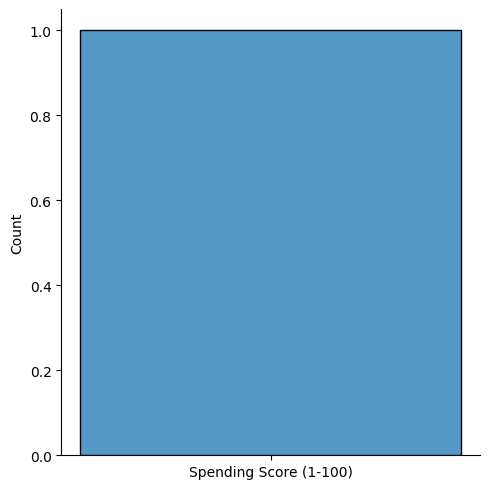

In [5]:
sns.displot(['Spending Score (1-100)'])

<AxesSubplot: xlabel='Age', ylabel='Count'>

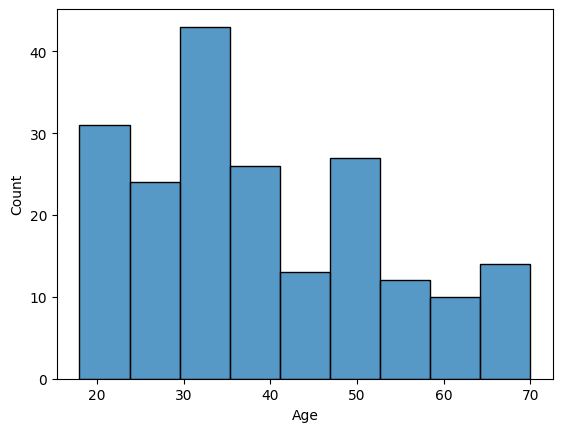

In [7]:
sns.histplot(dataset['Age'])

<AxesSubplot: ylabel='Age'>

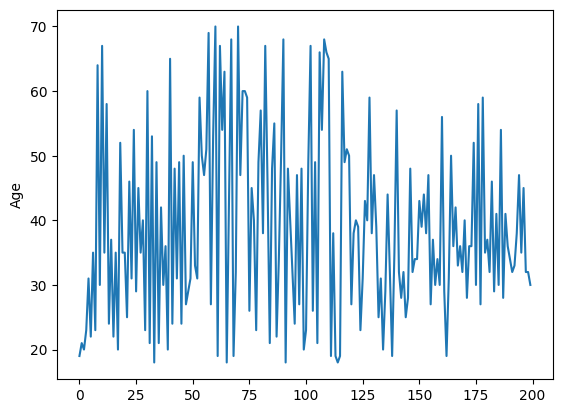

In [9]:
sns.lineplot(dataset['Age'])

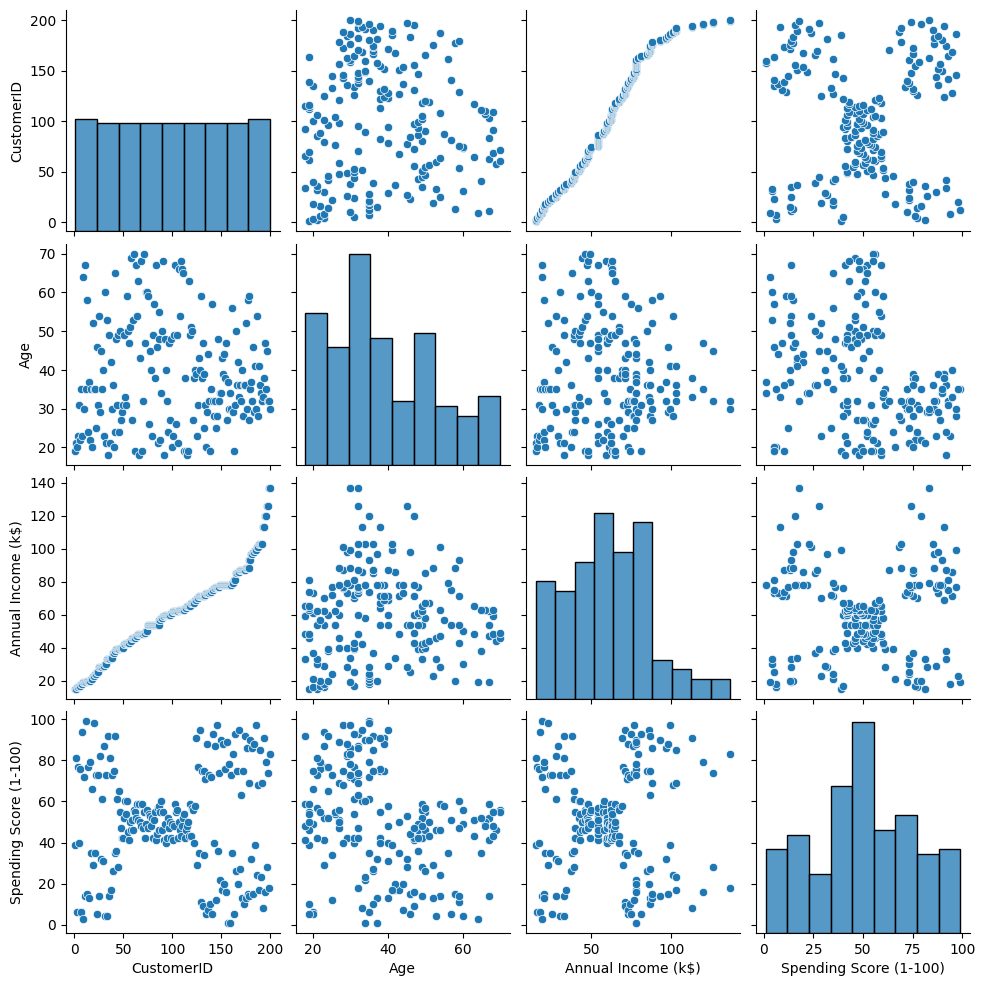

In [16]:
sns.pairplot(dataset)

4 : Perform descriptive statistics on the dataset.

In [23]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


5 : Check for Missing values and deal with them.

In [25]:
dataset.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

6 : Find the outliers and replace them outliers

In [28]:
outliers = dataset.quantile(q = (0.25, 0.75))
outliers

/var/folders/3b/2r6zdvhn77s_h6tcg7vjczhrdcb0vx/T/ipykernel_88115/1441212431.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  outliers = dataset.quantile(q = (0.25, 0.75))


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


<AxesSubplot: >

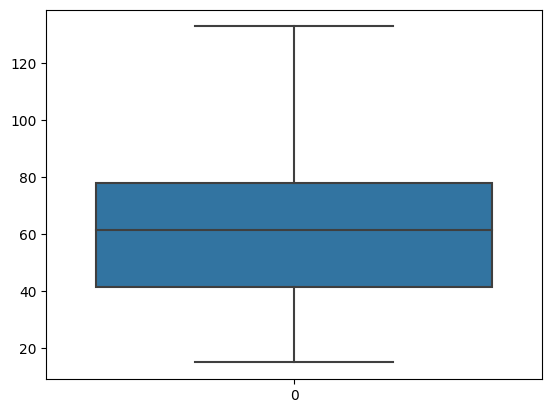

In [65]:
Q1 = dataset['Annual Income (k$)'].quantile(0.25)
Q3 = dataset['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
dataset['Annual Income (k$)']=np.where(dataset['Annual Income (k$)']>upper_whisker,upper_whisker,np.where(dataset['Annual Income (k$)']<lower_whisker,lower_whisker,dataset['Annual Income (k$)']))
sns.boxplot(dataset['Annual Income (k$)'])

7 : Check for Categorical columns and perform encoding.

In [67]:
numeric_data = dataset.select_dtypes(include=[np.number]) 
categorical_data = dataset.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1])

Number of numerical variables:  4
Number of categorical variables:  1


In [68]:
print("Number of categorical variables: ", categorical_data.shape[1]) 
Categorical_variables = list(categorical_data.columns)
Categorical_variables

Number of categorical variables:  1


['Gender']

In [69]:
print("Number of categorical variables: ", categorical_data.shape[1]) 
Categorical_variables = list(categorical_data.columns)
Categorical_variables

Number of categorical variables:  1


['Gender']

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(dataset['Gender'])
dataset["Gender"] = label
dataset['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

8 : Scaling the data

In [73]:
X = dataset.drop("Age",axis=1)
Y = dataset['Age']
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[-1.7234121   1.12815215 -1.74542941 -0.43480148]
 [-1.70609137  1.12815215 -1.74542941  1.19570407]
 [-1.68877065 -0.88640526 -1.70708307 -1.71591298]
 [-1.67144992 -0.88640526 -1.70708307  1.04041783]
 [-1.6541292  -0.88640526 -1.66873673 -0.39597992]
 [-1.63680847 -0.88640526 -1.66873673  1.00159627]
 [-1.61948775 -0.88640526 -1.6303904  -1.71591298]
 [-1.60216702 -0.88640526 -1.6303904   1.70038436]
 [-1.5848463   1.12815215 -1.59204406 -1.83237767]
 [-1.56752558 -0.88640526 -1.59204406  0.84631002]
 [-1.55020485  1.12815215 -1.59204406 -1.4053405 ]
 [-1.53288413 -0.88640526 -1.59204406  1.89449216]
 [-1.5155634  -0.88640526 -1.55369772 -1.36651894]
 [-1.49824268 -0.88640526 -1.55369772  1.04041783]
 [-1.48092195  1.12815215 -1.55369772 -1.44416206]
 [-1.46360123  1.12815215 -1.55369772  1.11806095]
 [-1.4462805  -0.88640526 -1.51535138 -0.59008772]
 [-1.42895978  1.12815215 -1.51535138  0.61338066]
 [-1.41163905  1.12815215 -1.43865871 -0.82301709]
 [-1.39431833 -0.88640526 -1.43

In [74]:
X_scaled  = pd.DataFrame(scale, columns = X.columns)
X_scaled

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.745429,-0.434801
1,-1.706091,1.128152,-1.745429,1.195704
2,-1.688771,-0.886405,-1.707083,-1.715913
3,-1.671450,-0.886405,-1.707083,1.040418
4,-1.654129,-0.886405,-1.668737,-0.395980
...,...,...,...,...
195,1.654129,-0.886405,2.280936,1.118061
196,1.671450,-0.886405,2.511014,-0.861839
197,1.688771,1.128152,2.511014,0.923953
198,1.706091,1.128152,2.769852,-1.250054


9 : Perform any of the clustering algorithms

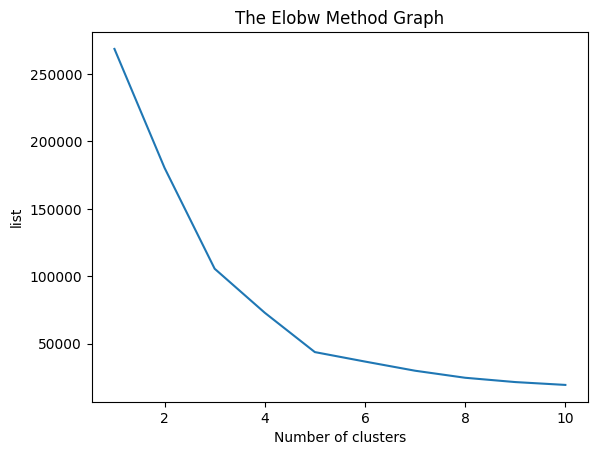

In [78]:
x = dataset.iloc[:, [3, 4]].values
from sklearn.cluster import KMeans  
list= []
for i in range(1, 11):  
    means = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    means.fit(x)  
    list.append(means.inertia_)  
plt.plot(range(1, 11), list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters')  
plt.ylabel('list')  
plt.show()

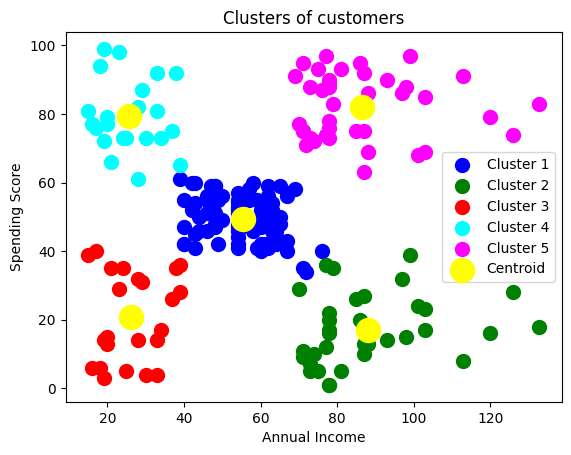

In [81]:
means = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
predict= means.fit_predict(x)
plt.scatter(x[predict == 0, 0], x[predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[predict == 1, 0], x[predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[predict== 2, 0], x[predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[predict == 3, 0], x[predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[predict == 4, 0], x[predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(means.cluster_centers_[:, 0], means.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income')  
plt.ylabel('Spending Score')  
plt.legend()  
plt.show()